# Unbinned Likelihood fits

In this notebook we will be using probfit together with iminuit to perform an Unbinned Likelihood fit.
  
probfit:  
https://probfit.readthedocs.io/en/latest/  
 
iMinuit:    
https://iminuit.readthedocs.io/en/latest/index.html#  

Here below a quick summary of:    
http://piti118.github.io/babar_python_tutorial/notebooks/04_Fitting.html  


In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats
from math import exp, pi, sqrt
#from probfit import UnbinnedLH
from argparse import Namespace
import math

from iminuit import Minuit, describe
from iminuit.cost import UnbinnedNLL

In [2]:
# Generate data
# set the seed to always get the same samples
np.random.seed(seed=12345)

# Generate a toy dataset on an gaussian distribution (signal)
#mu = 125, sigma = 1
gdata = scipy.stats.norm.rvs(loc=0, scale=1, size=10)
truth = Namespace(mu=0, sigma=1)

def norm_pdf(x, mu, sigma):
    invs = 1.0 / sigma
    z = (x - mu) * invs
    invnorm = 1 / np.sqrt(2 * np.pi) * invs
    return np.exp(-0.5 * z ** 2) * invnorm

def nb_erf(x):
    y = np.empty_like(x)
    for i in range(len(x)):
        y[i] = math.erf(x[i])
    return y

def norm_cdf(x, mu, sigma):
    invs = 1.0 / (sigma * np.sqrt(2))
    z = (x - mu) * invs
    return 0.5 * (1 + nb_erf(z))

def norm_delta(xrange, mu, sigma):
    c = norm_cdf(xrange, mu, sigma)
    return c[1] - c[0]


Text(0, 0.5, 'Entries / bins size = 0.4')

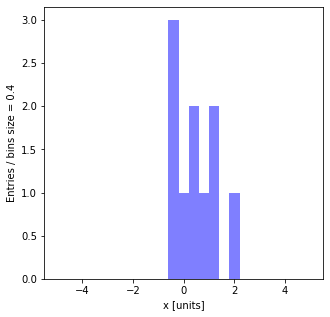

In [3]:
plt.figure(figsize=[5,5])
plt.subplot(111)
xrange = [-5,5]
n, bins, patches = plt.hist(gdata, bins=25, range=xrange, color='blue', alpha=0.5)
max = np.amax(n)
plt.xlabel(r'x [units]')
plt.ylabel(r'Entries / bins size = 0.4')

In [19]:
m = Minuit(UnbinnedNLL(gdata,
                       lambda x, mu, sigma: (norm_pdf(x, mu, sigma) / norm_delta(xrange, mu, sigma)),
                      ),
           mu=truth.mu,
           sigma=truth.sigma,
          )



In [28]:
m.migrad()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 23.98                      │              Nfcn = 85               │
│ EDM = 1.28e-23 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │   0.49    │   0.25    │            │            │         │         │       │
│ 1 │ sigma │   0.80    │   0.18    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────┐
│       │        mu     sigma │
├───────┼─────────────────────┤
│    mu │    0.0644 -4.21e-07 │
│ sigma │ -4.21e-07    0.0322 │
└───────┴─────────────────────┘

TypeError: unsupported operand type(s) for -: 'list' and 'float'

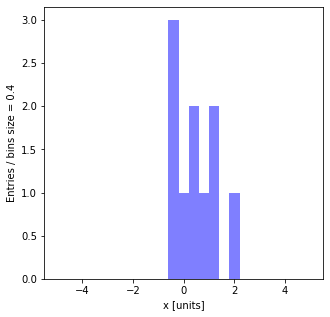

In [36]:
# Show() is the same thing as draw(). But show the figure immediately.
plt.figure(figsize=[5,5])
plt.subplot(111)
xrange = [-5,5]
n, bins, patches = plt.hist(gdata, bins=25, range=xrange, color='blue', alpha=0.5)
max = np.amax(n)
plt.xlabel(r'x [units]')
plt.ylabel(r'Entries / bins size = 0.4')

#plt.plot(gdata, norm_pdf(gdata, m.values[0], m.values[1])/norm_delta(xrange, m.values[0], m.values[1]) , label="fit")
plt.plot(gdata, norm_pdf(gdata, m.values[0], m.values[1])/norm_delta(xrange, m.values[0], m.values[1])  , label="fit")


# plt.figure(figsize=[5,5])
# plt.ylim([0.1,max*1.5])
# ulh.show(m, bins=25, bound=[-5,5],print_par=True)
# m.get_param_states()

In [7]:
m.covariance

┌───────┬───────────────────┐
│       │       mu    sigma │
├───────┼───────────────────┤
│    mu │   0.0644 2.43e-05 │
│ sigma │ 2.43e-05   0.0322 │
└───────┴───────────────────┘

In [8]:
m.minos()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 23.98                      │              Nfcn = 140              │
│ EDM = 7.37e-10 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │   0.49    │   0.25    │   -0.26    │    0.26    │         │         │       │
│ 1 │ sigma │   0.80    │   0.18    │   -0.15    │    0.22    │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │          mu           │         sigma         │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.26   │   0.26    │   -0.15   │   0.22    │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌───────┬───────────────────┐
│       │       mu    sigma │
├───────┼───────────────────┤
│    mu │   0.0644 2.43e-05 │
│ sigma │ 2.43e-05   0.0322 │
└───────┴───────────────────┘

In [9]:
m.params

┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │   0.49    │   0.25    │   -0.26    │    0.26    │         │         │       │
│ 1 │ sigma │   0.80    │   0.18    │   -0.15    │    0.22    │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

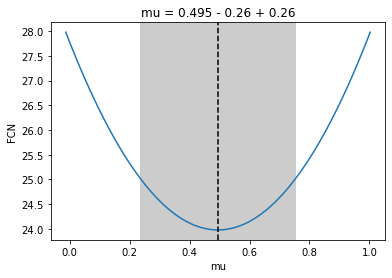

In [10]:
m.draw_profile('mu');

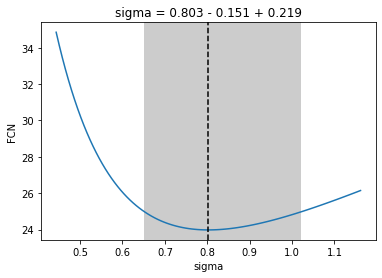

In [11]:
m.draw_profile('sigma');

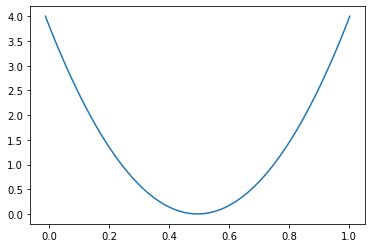

In [12]:
px, py = m.profile('mu', subtract_min=True)
plt.plot(px, py);

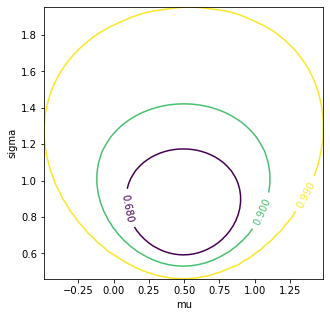

In [13]:
plt.figure(figsize=[5,5])
m.draw_mncontour('mu', 'sigma', cl=(0.68, 0.9, 0.99), size=100)  # nsigma=4 says: draw four contours from sigma=1 to 4